In [1]:
import pandas as pd
import numpy as np

In [27]:
x_1 = [1,1,1,1,1,1,0,0,0,0,0,0]*50
x_2 = [1,1,1,0,0,0,1,1,1,0,0,0]*50
x_3 = [1,0,1,0,1,0,1,0,1,0,1,0]*50

df = pd.DataFrame(zip(x_1,x_2,x_3))
df.columns = ['x1','x2','x3']

In [28]:
df['y'] = df.apply(lambda seq: 1 * (seq.x1 +  seq.x2*seq.x3) + np.random.normal(), axis = 1)

In [29]:
df.groupby(['x1','x2','x3']).agg({'y':np.mean})

y
x1 x2 x3          
0  0  0  -0.043386
      1   0.003831
   1  0  -0.083511
      1   0.917548
1  0  0   0.831720
      1   0.848827
   1  0   0.855134
      1   1.982167

In [79]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [80]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(ccp_alpha = 0.05)

In [81]:
reg.fit(df[['x1','x2','x3']], df.y)

DecisionTreeRegressor(ccp_alpha=0.05)

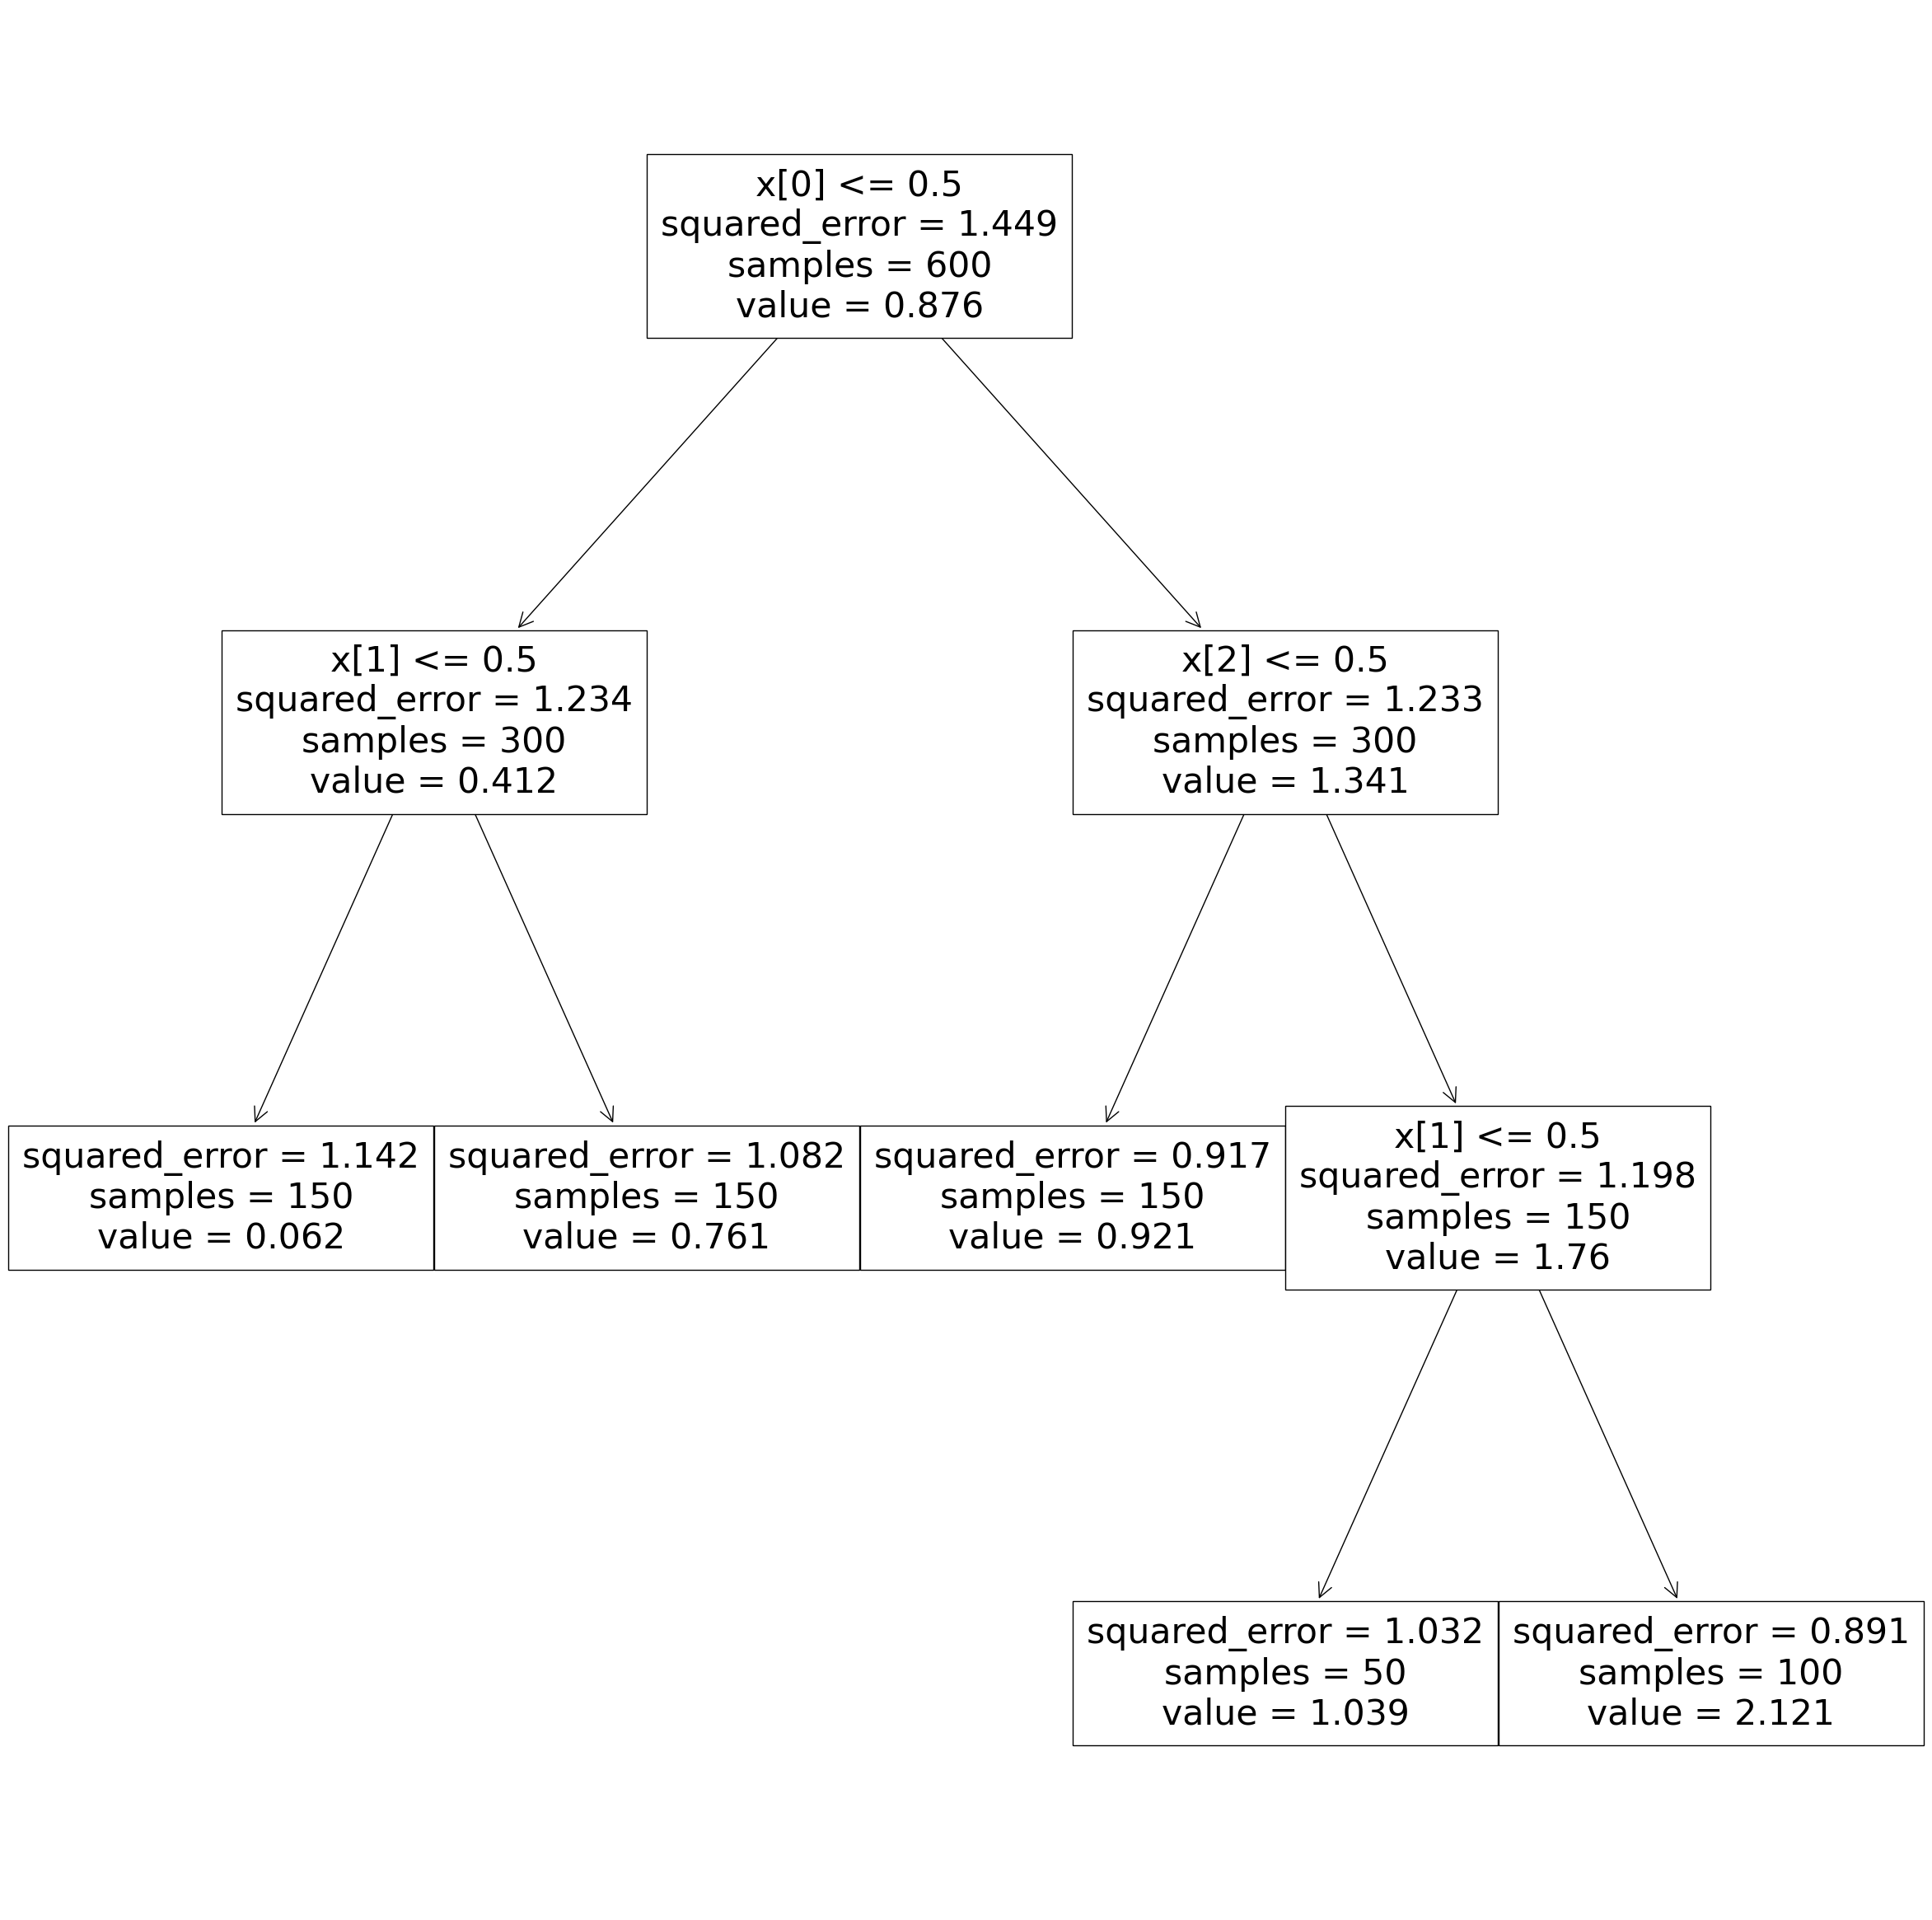

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (30, 30))
plot_tree(reg, ax = ax)
plt.show()
fig.savefig('decision_tree_example_1.png')


In [83]:
from sklearn.inspection import permutation_importance
x_1 = [1,1,1,1,1,1,0,0,0,0,0,0]*50
x_2 = [1,1,1,0,0,0,1,1,1,0,0,0]*50
x_3 = [1,0,1,0,1,0,1,0,1,0,1,0]*50

df = pd.DataFrame(zip(x_1,x_2,x_3))
df.columns = ['x1','x2','x3']
df['y'] = df.apply(lambda seq: 1 * (seq.x1 +  seq.x2*seq.x3) + np.random.normal(), axis = 1)
X_test = df.loc[:,:'x3']
y_test = df.y

In [84]:
df.shape


(600, 4)

In [85]:
from sklearn.metrics import r2_score, mean_squared_error

In [90]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=30,  n_jobs=8, scoring = 'neg_mean_squared_error'
)


In [91]:
result

{'importances_mean': array([0.41484202, 0.25958704, 0.12900153]),
 'importances_std': array([0.03580801, 0.03402072, 0.02942673]),
 'importances': array([[0.32589924, 0.3865839 , 0.39470146, 0.38844632, 0.45937922,
         0.45538108, 0.36719125, 0.44556247, 0.43543964, 0.41265938,
         0.45052527, 0.39754739, 0.44469315, 0.45946142, 0.4388971 ,
         0.3805368 , 0.38169999, 0.42016196, 0.40928492, 0.40867355,
         0.39589228, 0.43858314, 0.42651892, 0.37095432, 0.38395402,
         0.4598501 , 0.4461316 , 0.35922121, 0.47686264, 0.42456695],
        [0.24069228, 0.26779116, 0.32926922, 0.25973541, 0.30888979,
         0.2241489 , 0.29347279, 0.25792146, 0.24551652, 0.27042031,
         0.22883483, 0.22700555, 0.21485248, 0.2391112 , 0.24965441,
         0.32105465, 0.31850729, 0.25187846, 0.24949684, 0.29255958,
         0.24782123, 0.27244247, 0.21370108, 0.24592167, 0.25898073,
         0.25442299, 0.19965113, 0.22723165, 0.32260707, 0.25401799],
        [0.16541399, 0.1

In [92]:
tree_importances = pd.Series(result.importances_mean, index=['x1','x2','x3'])

In [98]:
result_df = pd.DataFrame(result['importances']).T
result_df.columns = ['x1','x2','x3']

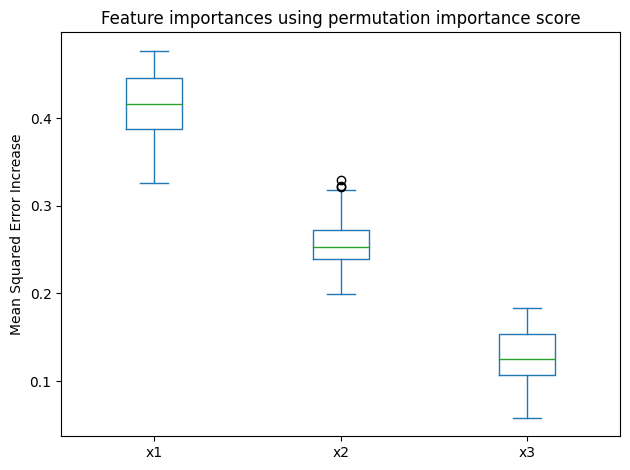

In [105]:
fig, ax = plt.subplots()
result_df.plot.box(ax = ax )
ax.set_title("Feature importances using permutation importance score")
ax.set_ylabel("Mean Squared Error Increase")
fig.tight_layout()
fig.savefig('permutation_score_plot_example_1.png')
plt.show()

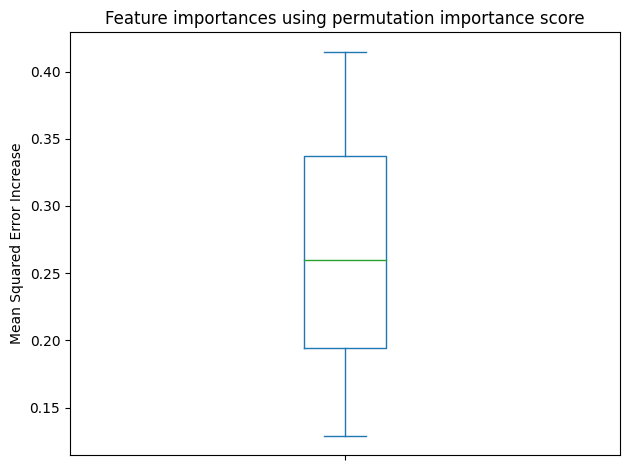

In [94]:
fig, ax = plt.subplots()
# tree_importances.plot.bar(yerr=result.importances_std, ax=ax)
tree_importances.plot.box(ax = ax)
ax.set_title("Feature importances using permutation importance score")
ax.set_ylabel("Mean Squared Error Increase")
fig.tight_layout()
fig.savefig('permutation_score_plot_example_1.png')
plt.show()